# DEA accredited proejcts analysis 2019-2025

## import libraries and data

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [216]:
df = pd.read_csv('C:/Users/balin/Desktop/ADR_DEA_project/data/dea_accredited_projects.csv')

In [217]:
df.head()

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date
0,2019/003,The fall of the labour share and rise of the s...,"Carolin Ioramashvili, London School of Economics",Digital Economy Act (2017),Office for National Statistics: Annual Respond...,Office for National Statistics Secure Research...,10/25/2019
1,2019/004,The changing nature of the HR and training pra...,"Jonathan Boys, Chartered Institute of Personne...",Digital Economy Act (2017),Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,10/25/2019
2,2019/006,Analysis of victimisation data from the Crime ...,"Julian Molina, Office of the Victims' Commissi...",Digital Economy Act (2017),Office for National Statistics: Crime Survey f...,Office for National Statistics Secure Research...,10/14/2019
3,2019/007,Thriving Places index – indicators of wellbein...,"Soraya Safazadeh, Happy City Initiative\nSaama...",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,10/14/2019
4,2019/008,Class in UK creative industries: Beyond partic...,"Rebecca Florisson, The Work Foundation",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,11/19/2019


## Tidy the data

In [218]:
df.isna().sum()

Project ID                 0
Title                      0
Researchers                2
Legal Basis                0
Datasets Used              1
Secure Research Service    0
Accreditation Date         0
dtype: int64

In [219]:
missing_researchers = df[df['Researchers'].isna()]

In [220]:
missing_datasets = df[df['Datasets Used'].isna()]

In [221]:
# Drop rows with missing datasets used
df = df.dropna(subset=['Datasets Used'])

In [222]:
df.head()

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date
0,2019/003,The fall of the labour share and rise of the s...,"Carolin Ioramashvili, London School of Economics",Digital Economy Act (2017),Office for National Statistics: Annual Respond...,Office for National Statistics Secure Research...,10/25/2019
1,2019/004,The changing nature of the HR and training pra...,"Jonathan Boys, Chartered Institute of Personne...",Digital Economy Act (2017),Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,10/25/2019
2,2019/006,Analysis of victimisation data from the Crime ...,"Julian Molina, Office of the Victims' Commissi...",Digital Economy Act (2017),Office for National Statistics: Crime Survey f...,Office for National Statistics Secure Research...,10/14/2019
3,2019/007,Thriving Places index – indicators of wellbein...,"Soraya Safazadeh, Happy City Initiative\nSaama...",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,10/14/2019
4,2019/008,Class in UK creative industries: Beyond partic...,"Rebecca Florisson, The Work Foundation",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,11/19/2019


In [223]:
df['Legal Basis'].value_counts()

Legal Basis
Digital Economy Act (2017)                                                                                                                                                                                                                                                       1023
Statistics and Registration Services Act 2007 (SRSA) - Approved Researcher Gateway: added data after 9 September 2021                                                                                                                                                              98
Digital Economy Act 2017                                                                                                                                                                                                                                                           18
Statistics and Registration Services Act 2007 (SRSA) - Approved Researcher Gateway: added data after 9 September 2021s Act 2007 (SRSA) - Approved Research

What's the difference between the DEA and SRSA? 
| Aspect                       | **SRSA (2007)**                                   | **DEA (2017)**                                                 |
| ---------------------------- | ------------------------------------------------- | -------------------------------------------------------------- |
| **Legal Authority**          | Statistics and Registration Service Act 2007      | Digital Economy Act 2017 – Chapter 5 (Research Strand)         |
| **Main Data Custodian**      | Office for National Statistics (ONS) only         | Any specified public authority (incl. ONS, NHS, DWP, etc.) |
| **Scope of Data Sharing**    | ONS data only                                     | Cross-government administrative data                           |
| **Type of Research**         | Purely **statistical** purposes                   | Broader research (including policy evaluation)             |
| **Researcher Accreditation** | Required – via UK Statistics Authority (UKSA)     | Required – same UKSA framework                                 |
| **Secure Access Required**   | Yes (e.g. Secure Research Service)                | Yes (e.g. via an accredited processor or secure lab)           |
| **Public Benefit Test**      | Yes                                               | Yes                                                            |
| **Data Sharing Permissions** | Limited to non-identifying, statistical data only | Can include de-identified **admin** data for wider use         |
| **Oversight Body**           | UK Statistics Authority (and ONS)                 | UK Statistics Authority (with DEA Governance Board input)      |




In [224]:
# Clean Legal Basis column by removing SRSA rows
df = df[~df['Legal Basis'].str.contains('SRSA', na=False)]
# tidy up DEA labels
df['Legal Basis'] = df['Legal Basis'].str.replace('Digital Economy Act (2017)', 'Digital Economy Act 2017')
df['Legal Basis'].value_counts()

Legal Basis
Digital Economy Act 2017    1041
Name: count, dtype: int64

In [225]:
df.isna().sum()

Project ID                 0
Title                      0
Researchers                2
Legal Basis                0
Datasets Used              0
Secure Research Service    0
Accreditation Date         0
dtype: int64

In [229]:
import re

def extract_datasets(row):
    """
    Extract dataset names from the 'Datasets Used' column.
    Handles multiple data sources and newlines, but doesn't filter values.
    """
    if pd.isna(row) or row == "":
        return []
    
    # Replace newlines and normalize other separators
    processed = row.replace("\n", ";").replace("\\n", ";")
    
    results = []
    
    # Split by semicolons to handle multiple data sources
    for entry in processed.split(";"):
        entry = entry.strip()
        if not entry:
            continue
        
        # Handle the case with or without a data source (colon)
        if ":" in entry:
            # Split only on the first colon
            parts = entry.split(":", 1)
            datasets = parts[1].strip()
            
            # Skip if there's nothing after the colon
            if not datasets:
                continue
        else:
            datasets = entry
        
        # Split by commas and process each dataset
        for ds in datasets.split(","):
            ds = ds.strip()
            
            # Only skip empty strings
            if not ds:
                continue
            
            results.append(ds)
    
    return results

In [ ]:
# lowercase the datasets used column
df["datasets_clean"] = df["Datasets Used"].str.lower()

# apply the function to create a list of dataset names
df["dataset_list"] = df["datasets_clean"].apply(lambda x: extract_datasets(x) if pd.notnull(x) else [])

# explode the dataset list to one dataset per row
df_exploded = df.explode("dataset_list")

all_datasets_df = df_exploded['dataset_list'].value_counts().reset_index()
all_datasets_df.columns = ['dataset', 'count']
all_datasets_df

,dataset,count
0,business structure database,129
1,annual business survey,121
2,annual population survey,96
3,annual survey of hours and earnings,90
4,business structure database - uk,83
...,...,...
666,2007-2021,1
667,census wales 2011,1
668,2005-2024,1
669,longitudinal small business survey uk,1


In [234]:
df_exploded[df_exploded['dataset_list'] == 'nhs']

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,datasets_clean,dataset_list
965,2024/163,Exploring the Impact of Clinical Diagnosis on ...,"Elizabeth Camacho, The University of Liverpool...",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,27/08/2024,nhs; dfe: education and child health insights ...,nhs
972,2024/197,Evaluating the effects of the growing and unev...,"David Frayman, The London School of Economics\...",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,16/10/2024,nhs; dfe: education and child health insights ...,nhs
984,2024/188,Pathways through support services in neurodive...,"Simona Skripkauskaite, University of Oxford",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,02/10/2024,nhs; dfe: education and child health insights ...,nhs
985,2024/187,Educational Outcomes after Paediatric Brain In...,"Hope Kent, University of Exeter\nHuw Wiliams, ...",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,01/10/2024,nhs; dfe: education and child health insights ...,nhs
997,2024/210,"MATCHED (Maternal mental health, Child Health ...","Stuart Jarvis, University of York",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,30/10/2024,nhs; dfe: education and child health insights ...,nhs
1009,2024/243,Ethnic and migration variation and impact of a...,"Alua Yeskendir, University College London\nKat...",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,06/12/2024,nhs; dfe: education and child health insights ...,nhs
1015,2025/017,"Out of Sight: Exclusions, Alternative Provisio...","Kalyan Kumar Kameshwara, University of Notting...",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,28/01/2025,nhs; dfe: education and child health insights ...,nhs
1024,2024/237,The Burden of Child Sexual Exploitation and Ab...,"Patricio Troncoso, The University of Edinburgh...",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,05/12/2024,nhs; dfe: education and child health insights ...,nhs
1031,2024/216,Psychosocial disadvantage in pregnancy: risk o...,"Rema Ramakrishnan, University of Oxford\nNicol...",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,08/11/2024,nhs; dfe: education and child health insights ...,nhs
1042,2024/230,"Health-related Outcomes, alternative Provision...","Justin Yang, University College London",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,03/12/2024,nhs; dfe: education and child health insights ...,nhs


In [236]:
df_exploded[df_exploded['Project ID'] == '2024/163']

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,datasets_clean,dataset_list
965,2024/163,Exploring the Impact of Clinical Diagnosis on ...,"Elizabeth Camacho, The University of Liverpool...",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,27/08/2024,nhs; dfe: education and child health insights ...,nhs
965,2024/163,Exploring the Impact of Clinical Diagnosis on ...,"Elizabeth Camacho, The University of Liverpool...",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,27/08/2024,nhs; dfe: education and child health insights ...,education and child health insights from linke...


In [ ]:
# All projects accessed a total number of datasets over 2800
all_datasets_df['count'].sum()

np.int64(2834)

## Some quick summary findings
- We have over 1000 projects approved under the DEA between [check month] 2019 - May 2025. 
- Projects applied to reuse an overall total of >2800 datasets 

## Overall use of different datasets

In [233]:
all_datasets_df.head()

,dataset,count
0,business structure database,129
1,annual business survey,121
2,annual population survey,96
3,annual survey of hours and earnings,90
4,business structure database - uk,83


### Overall use of ADR UK flagship datasets

## Use of datasets over time

In [20]:
# Convert accreditation date to datetime
df['Accreditation Date'] = pd.to_datetime(df['Accreditation Date'], errors='coerce')
df['Year'] = df['Accreditation Date'].dt.year

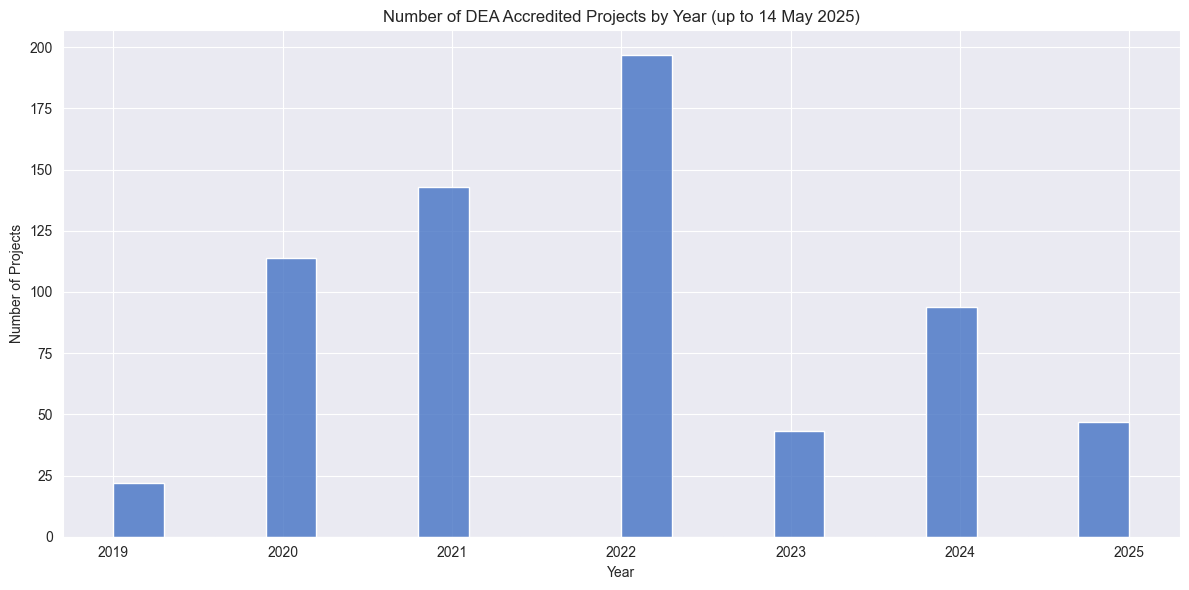

In [21]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.histplot(df['Year'], bins=20, color='#4472C4', 
    alpha=0.8,
    edgecolor='white',
    linewidth=1)
plt.title('Number of DEA Accredited Projects by Year (up to 14 May 2025)')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.tight_layout()

In [22]:
# ADR UK flagship datasets
flagship_datasets = ['agricultural research collection']

In [256]:
df_exploded[df_exploded['dataset_list'].str.contains('agricultural research collection', case=False, na=False)]

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,datasets_clean,dataset_list
425,2022/129,AD|ARC : Linking Individual and Farm Level Dat...,"Nicholas Webster, Welsh Government\nMatthew Ke...",Digital Economy Act 2017,Office for National Statistics: Agricultural R...,Office for National Statistics Secure Research...,11/09/2022,office for national statistics: agricultural r...,agricultural research collection
575,2023/076,AD|ARC (Administrative Data Agri-Research Coll...,"Nicholas Webster, Welsh Government\nSian Morri...",Digital Economy Act 2017,"Department for Environment, Food & Rural Affai...",Office for National Statistics Secure Research...,2023-05-24,"department for environment, food & rural affai...",bespoke admin data: agricultural research coll...
